# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [4]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [5]:
Currency_Pair = 'USDJPY'

## TF D1

In [6]:
TF = 'D1'

In [7]:
data_1 = XAUUSD[TF]

In [8]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

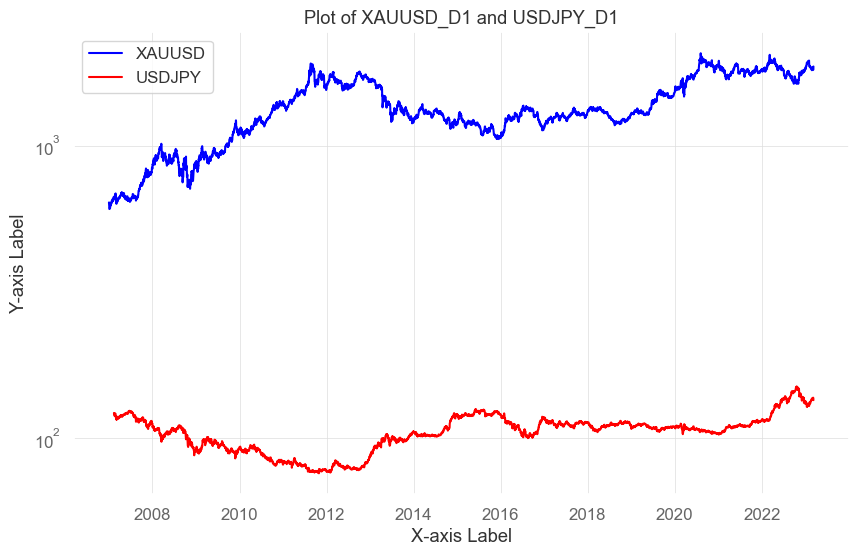

In [9]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [10]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [11]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          6.029e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:51:24   Log-Likelihood:                         -36815.
No. Observations:                4995   AIC:                                  7.363e+04
Df Residuals:                    4994   BIC:                                  7.364e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.6192      0.051    245.544      0.000      12.518      12.720
==============================================================================
Omnibus:                       68.039   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.705
Skew:                           0.002   Prob(JB):                     1.45e-09
Kurtosis:                       2.558   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = KF.Run(currency = 'JPY')

In [13]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.858311
Multiple (Buy-and-Hold):     3.701552
--------------------------------------
Out-/Underperformance:       -2.843241


CAGR:                        -0.00951
Annualized Mean:             -0.009556
Annualized Std:              0.029096
Sharpe Ratio:                -0.328426
Sortino Ratio:               -0.44525
Maximum Drawdown:            0.177928
Calmar Ratio:                -0.05345
Max Drawdown Duration:       5726 Days
Kelly Criterion:             -10.79712


### Save Result Backtest 

In [14]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [15]:
filename = f'{Currency_Pair}_{TF}.csv'

In [16]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -14.75%
CAGR﹪                     -0.69%

Sharpe                     -0.3
Prob. Sharpe Ratio         9.36%
Smart Sharpe               -0.29
Sortino                    -0.4
Smart Sortino              -0.4
Sortino/√2                 -0.28
Smart Sortino/√2           -0.28
Omega                      0.95

Max Drawdown               -18.14%
Longest DD Days            5726
Volatility (ann.)          2.61%
Calmar                     -0.04
Skew                       -0.49
Kurtosis                   5.92

Expected Daily %           -0.0%
Expected Monthly %         -0.08%
Expected Yearly %          -0.93%
Kelly Criterion            -2.78%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.27%
Expected Shortfall (cVaR)  -0.27%

Max Consecutive Wi

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-28,2019-06-19,2023-03-01,5726,-18.141185,-17.721937
2,2007-03-11,2007-04-20,2007-05-15,66,-0.405067,-0.401887
3,2007-05-28,2007-06-06,2007-06-07,11,-0.193608,-0.173017
4,2007-03-07,2007-03-07,2007-03-08,2,-0.068242,-0.023898
5,2007-06-17,2007-06-19,2007-06-19,3,-0.058754,-0.010075


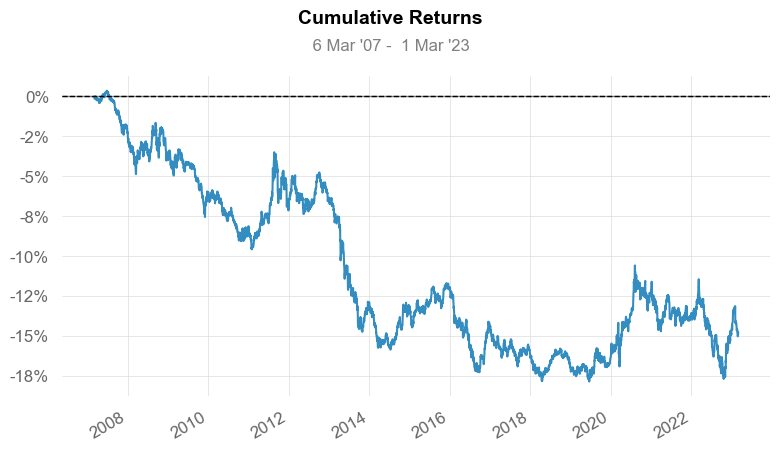

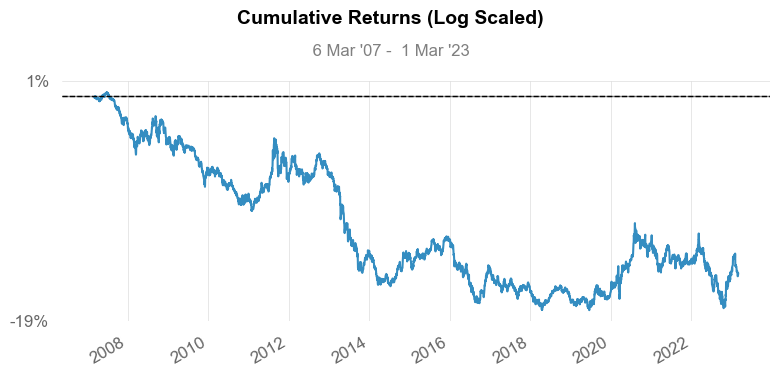

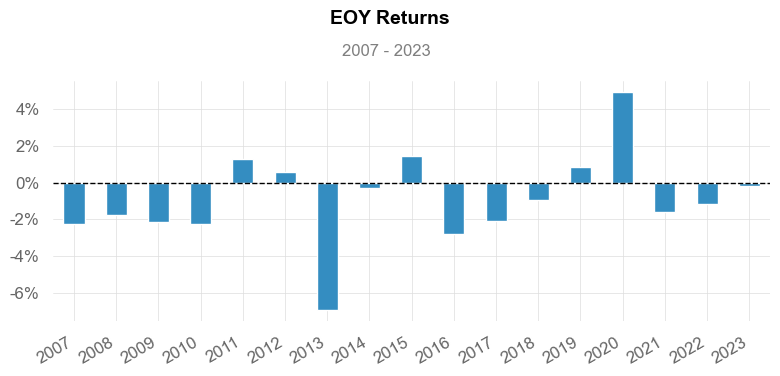

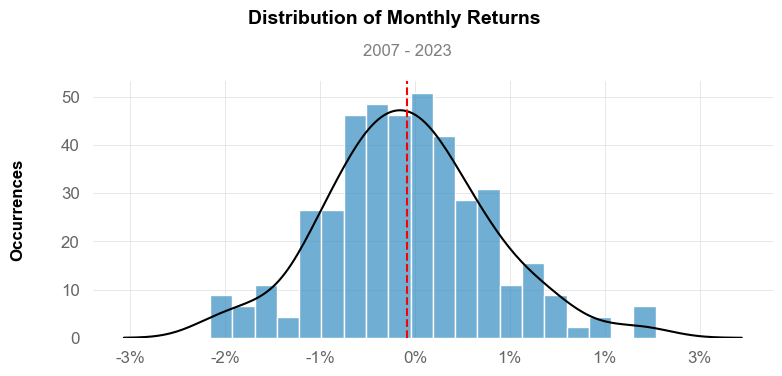

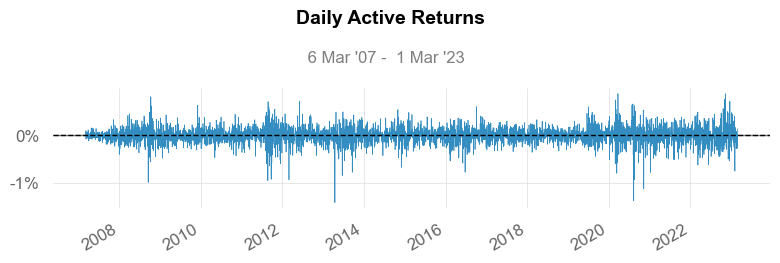

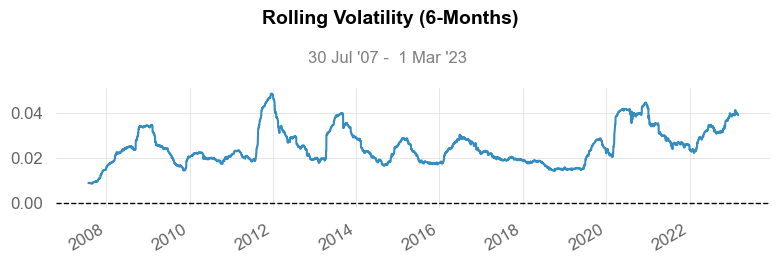

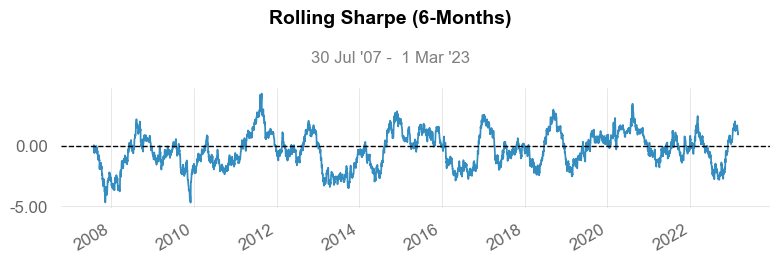

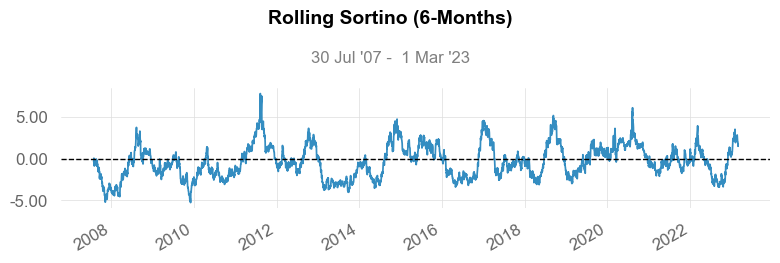

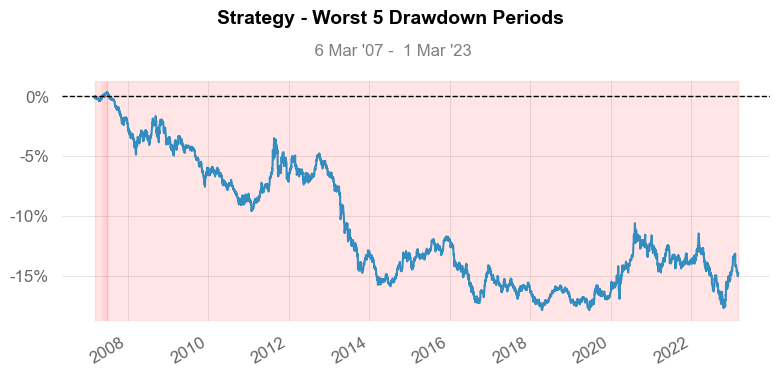

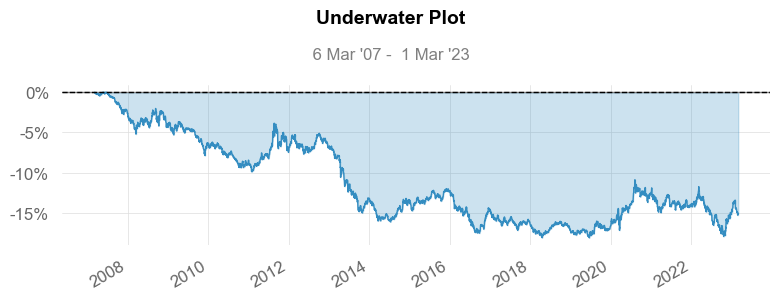

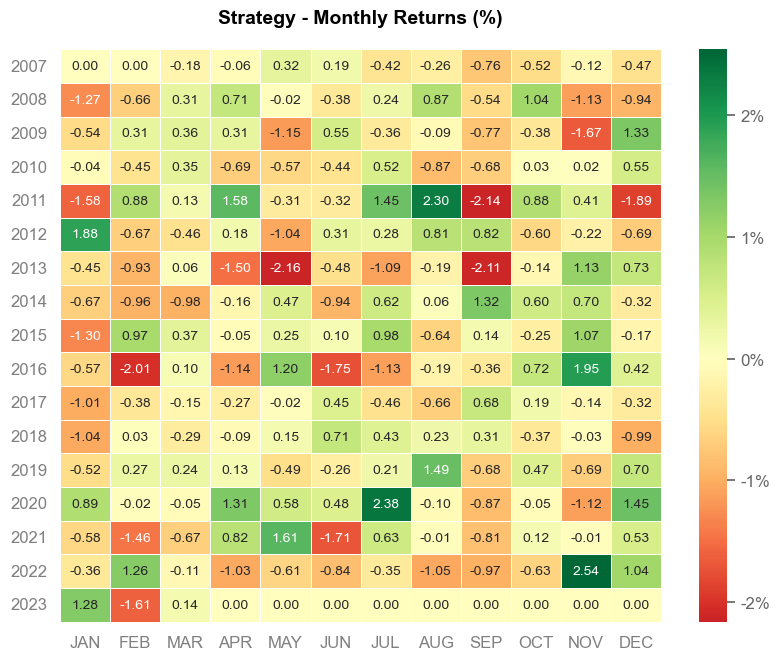

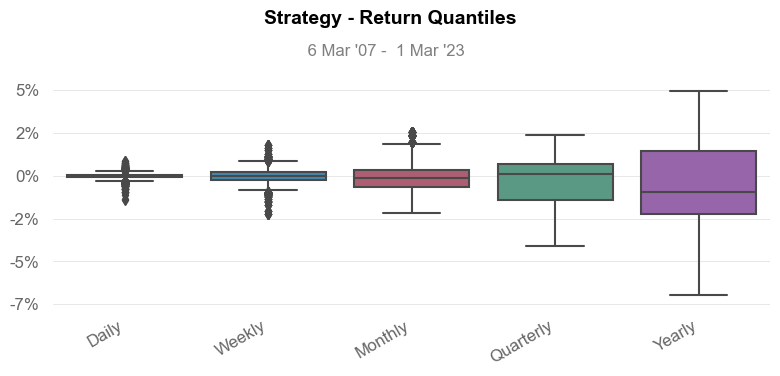

In [17]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [18]:
TF = 'H4'

In [19]:
data_1 = XAUUSD[TF]

In [20]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

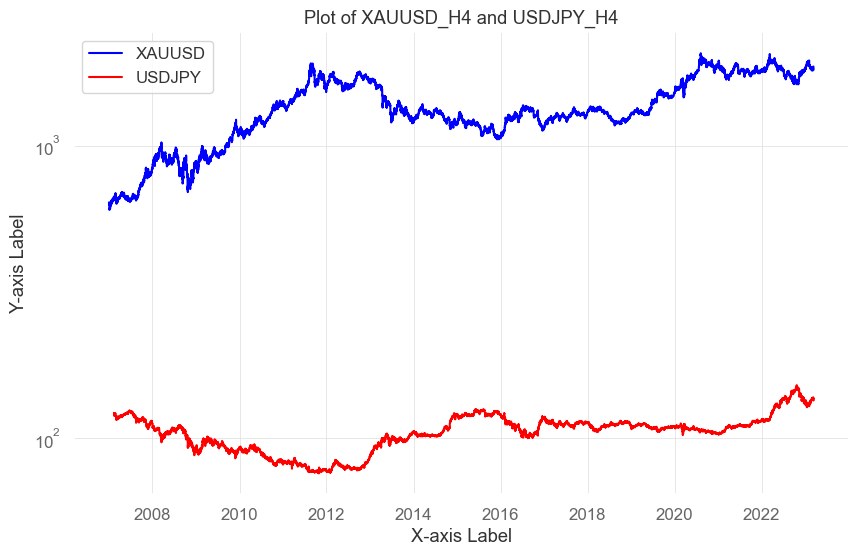

In [21]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [22]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [23]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          3.104e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:51:47   Log-Likelihood:                     -1.8969e+05
No. Observations:               25735   AIC:                                  3.794e+05
Df Residuals:                   25734   BIC:                                  3.794e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.6202      0.023    557.102      0.000      12.576      12.665
==============================================================================
Omnibus:                      352.209   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.984
Skew:                           0.000   Prob(JB):                     4.17e-46
Kurtosis:                       2.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result = KF.Run(currency = 'JPY')

In [25]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.867328
Multiple (Buy-and-Hold):     3.644616
--------------------------------------
Out-/Underperformance:       -2.777288


CAGR:                        -0.008863
Annualized Mean:             -0.008902
Annualized Std:              0.02852
Sharpe Ratio:                -0.312141
Sortino Ratio:               -0.430672
Maximum Drawdown:            0.169809
Calmar Ratio:                -0.052192
Max Drawdown Duration:       5727 Days
Kelly Criterion:             -10.44821


### Save Result Backtest 

In [26]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [27]:
filename = f'{Currency_Pair}_{TF}.csv'

In [28]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -13.9%
CAGR﹪                     -0.64%

Sharpe                     -0.28
Prob. Sharpe Ratio         10.66%
Smart Sharpe               -0.28
Sortino                    -0.38
Smart Sortino              -0.38
Sortino/√2                 -0.27
Smart Sortino/√2           -0.27
Omega                      0.95

Max Drawdown               -17.29%
Longest DD Days            5726
Volatility (ann.)          2.59%
Calmar                     -0.04
Skew                       -0.47
Kurtosis                   5.95

Expected Daily %           -0.0%
Expected Monthly %         -0.08%
Expected Yearly %          -0.88%
Kelly Criterion            -2.61%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.27%
Expected Shortfall (cVaR)  -0.27%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-28,2019-06-19,2023-03-01,5726,-17.288476,-16.822928
2,2007-03-11,2007-04-20,2007-05-15,66,-0.404759,-0.401581
3,2007-05-28,2007-06-06,2007-06-07,11,-0.193461,-0.172886
4,2007-03-07,2007-03-07,2007-03-08,2,-0.068190,-0.023880
5,2007-06-17,2007-06-19,2007-06-19,3,-0.058709,-0.010067


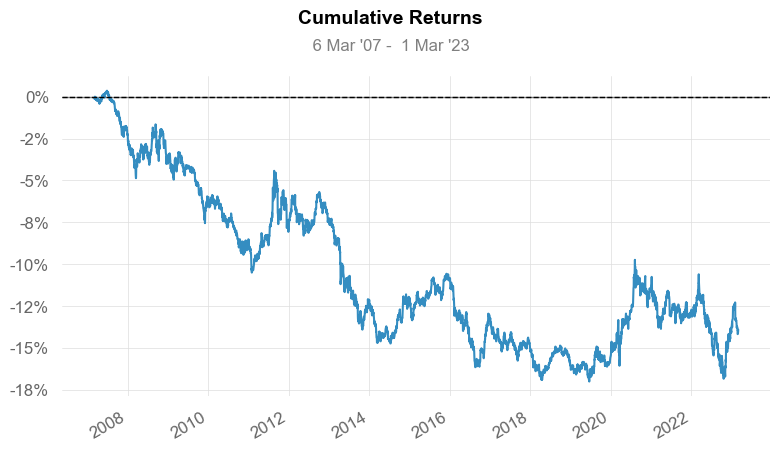

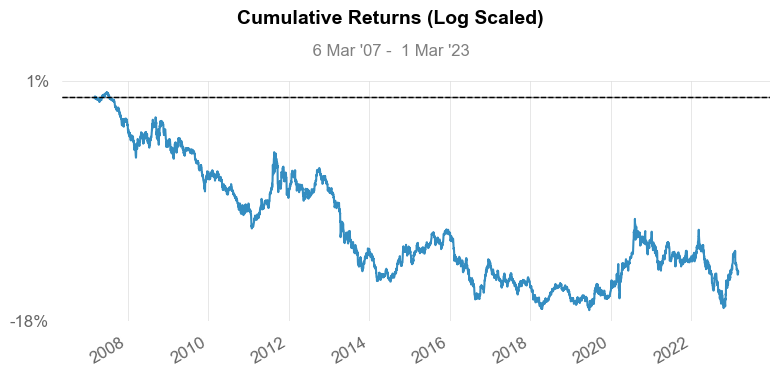

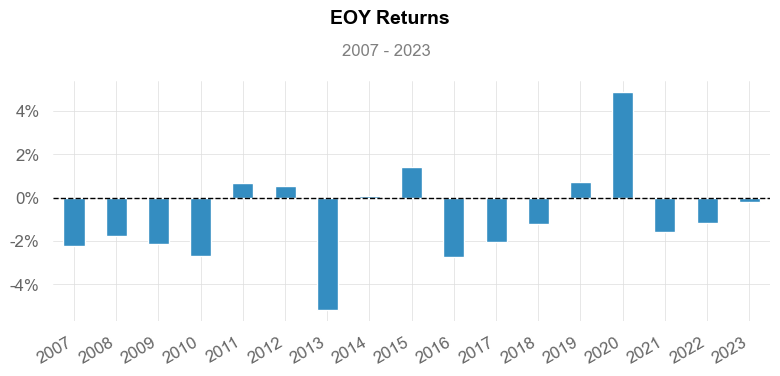

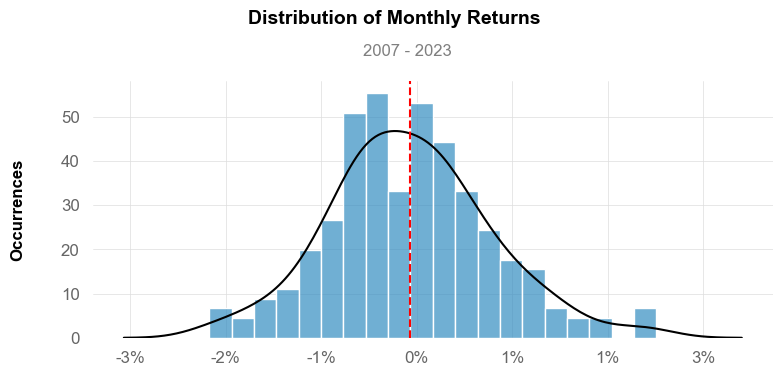

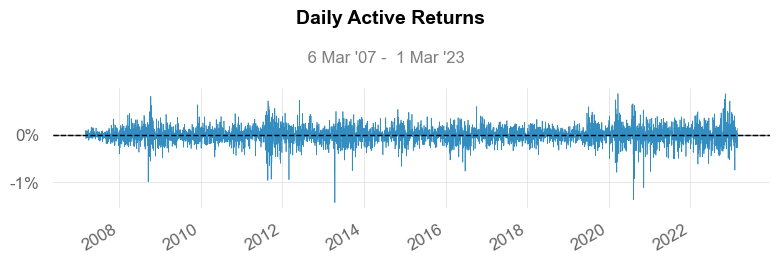

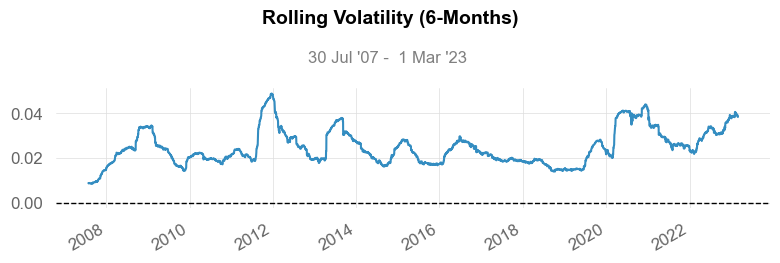

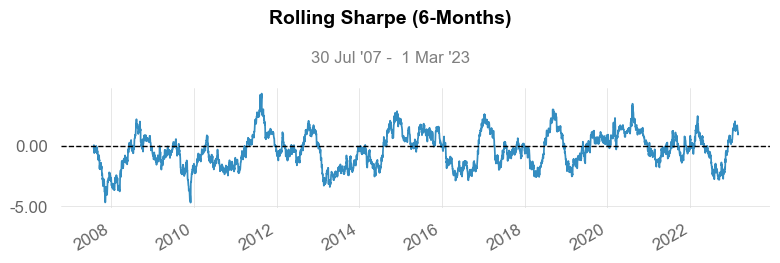

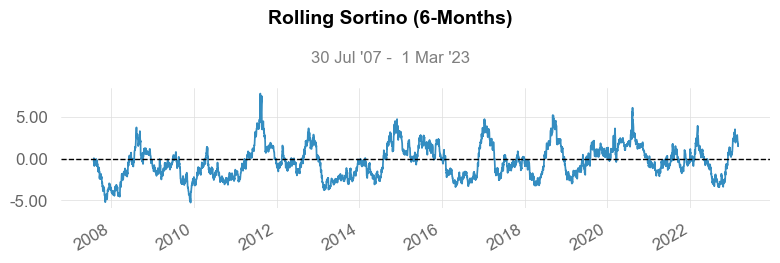

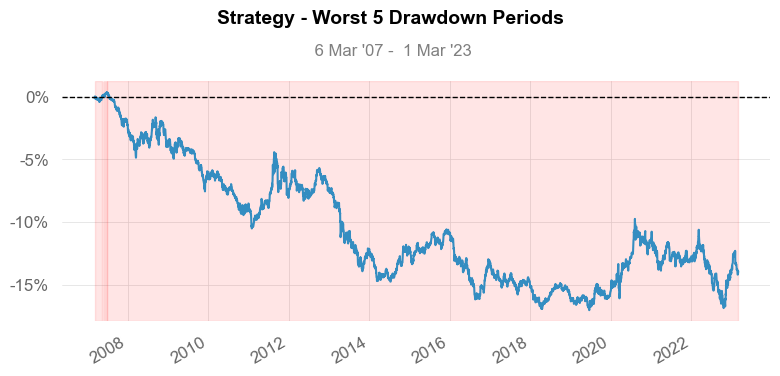

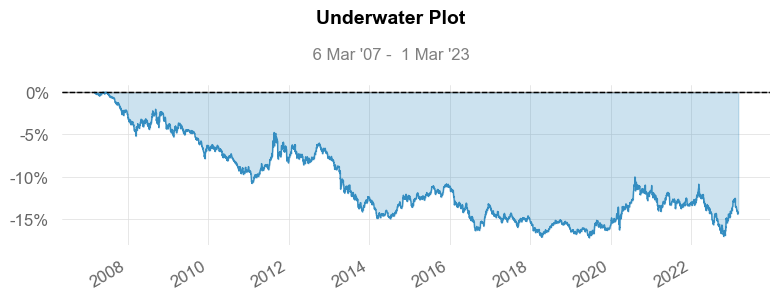

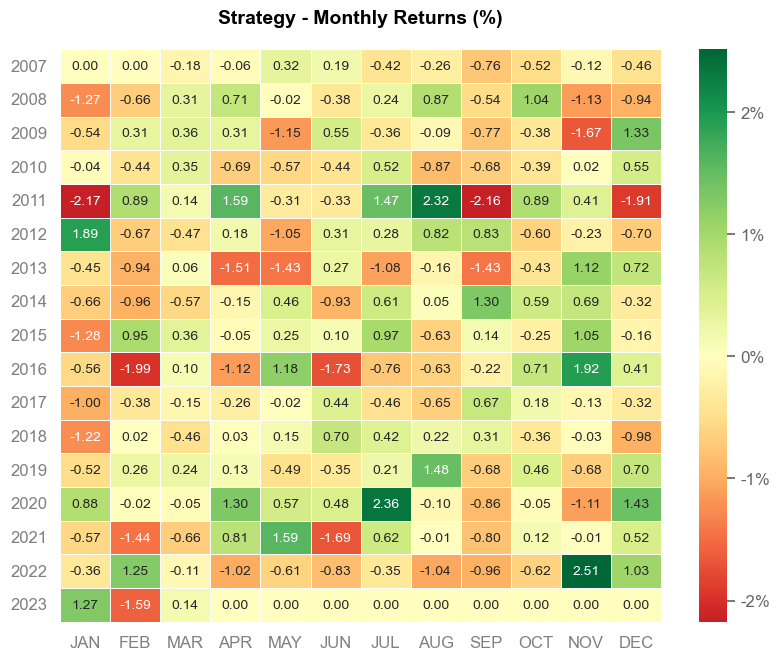

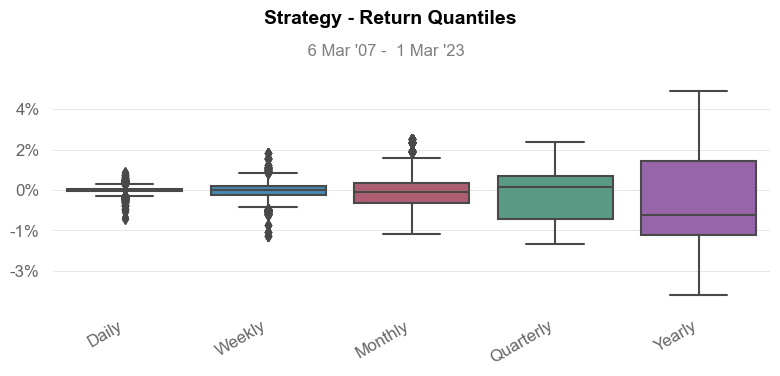

In [29]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [30]:
TF = 'H1'

In [31]:
data_1 = XAUUSD[TF]

In [32]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

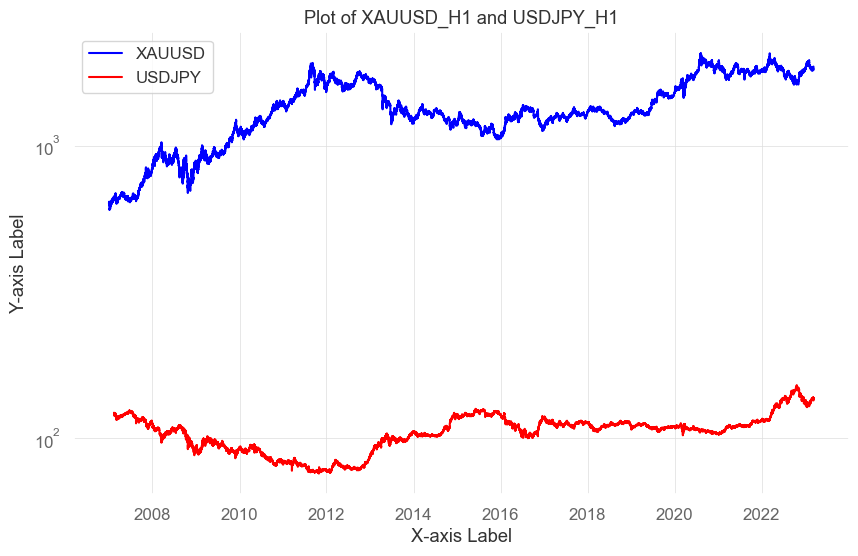

In [33]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [34]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [35]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          1.201e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:52:58   Log-Likelihood:                     -7.3358e+05
No. Observations:               99524   AIC:                                  1.467e+06
Df Residuals:                   99523   BIC:                                  1.467e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.6207      0.012   1095.676      0.000      12.598      12.643
==============================================================================
Omnibus:                     1362.012   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.146
Skew:                          -0.000   Prob(JB):                    5.38e-176
Kurtosis:                       2.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result = KF.Run(currency = 'JPY')

### Save Result Backtest 

In [37]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [38]:
filename = f'{Currency_Pair}_{TF}.csv'

In [39]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -13.4%
CAGR﹪                     -0.62%

Sharpe                     -0.27
Prob. Sharpe Ratio         11.53%
Smart Sharpe               -0.27
Sortino                    -0.37
Smart Sortino              -0.37
Sortino/√2                 -0.26
Smart Sortino/√2           -0.26
Omega                      0.95

Max Drawdown               -16.79%
Longest DD Days            5726
Volatility (ann.)          2.58%
Calmar                     -0.04
Skew                       -0.45
Kurtosis                   5.95

Expected Daily %           -0.0%
Expected Monthly %         -0.07%
Expected Yearly %          -0.84%
Kelly Criterion            -2.51%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.27%
Expected Shortfall (cVaR)  -0.27%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-28,2019-06-19,2023-03-01,5726,-16.794337,-16.320669
2,2007-03-11,2007-04-20,2007-05-15,66,-0.404712,-0.401535
3,2007-05-28,2007-06-06,2007-06-07,11,-0.193439,-0.172866
4,2007-03-07,2007-03-07,2007-03-08,2,-0.068182,-0.023877
5,2007-06-17,2007-06-19,2007-06-19,3,-0.058703,-0.010066


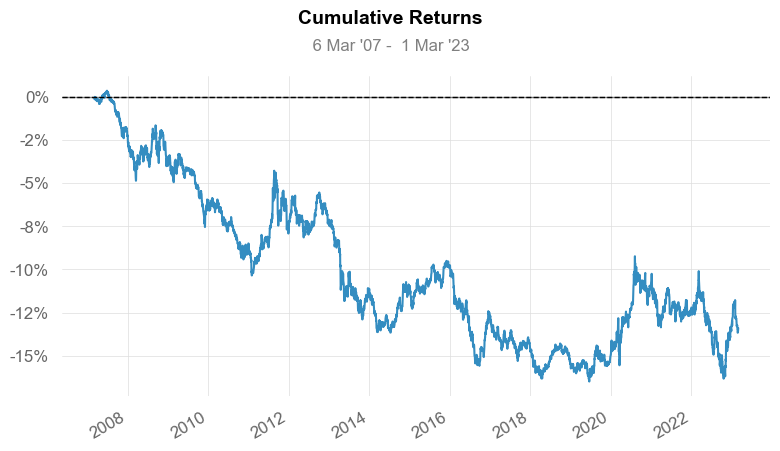

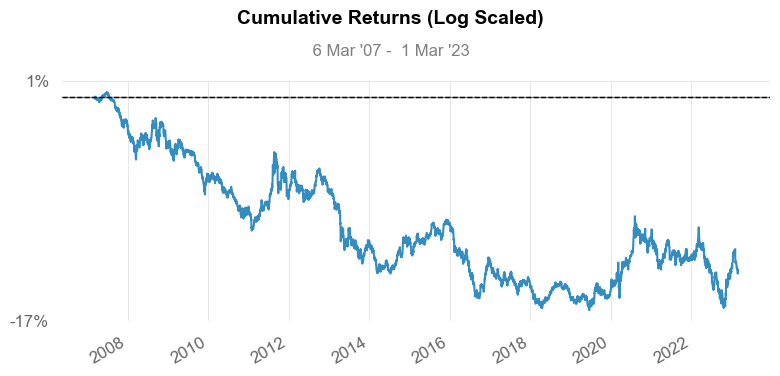

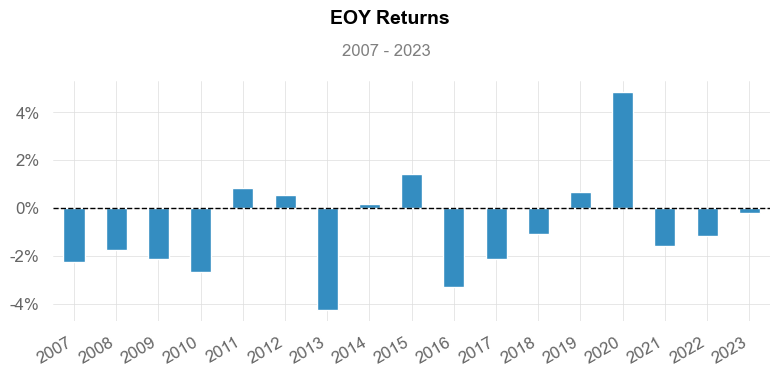

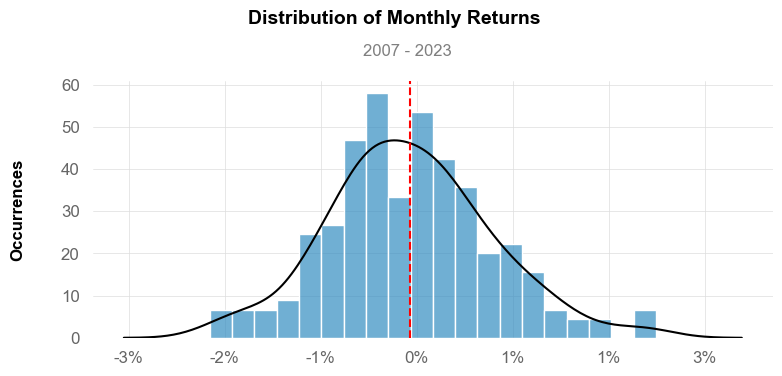

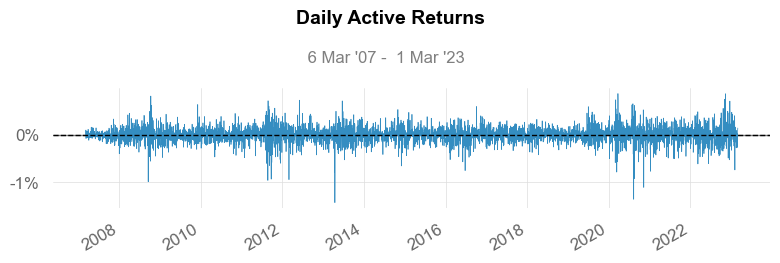

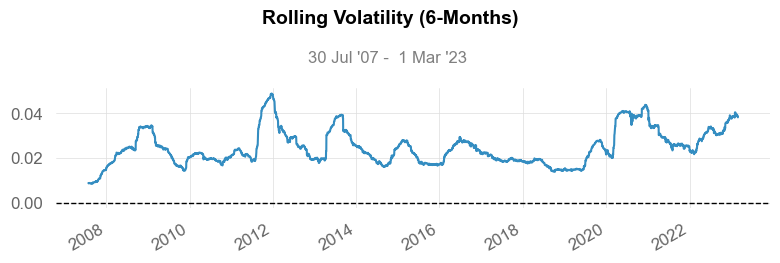

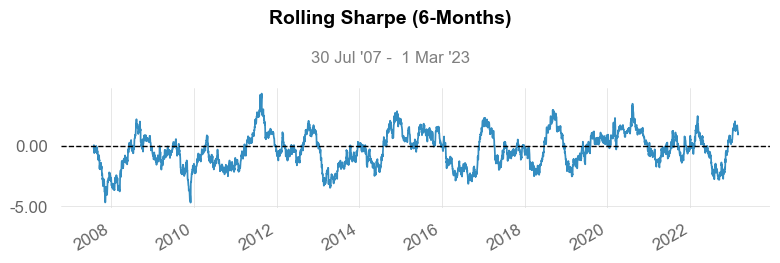

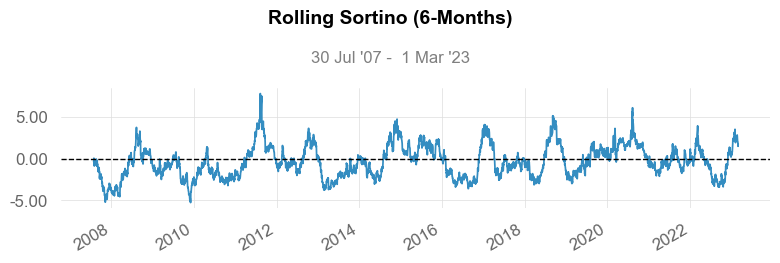

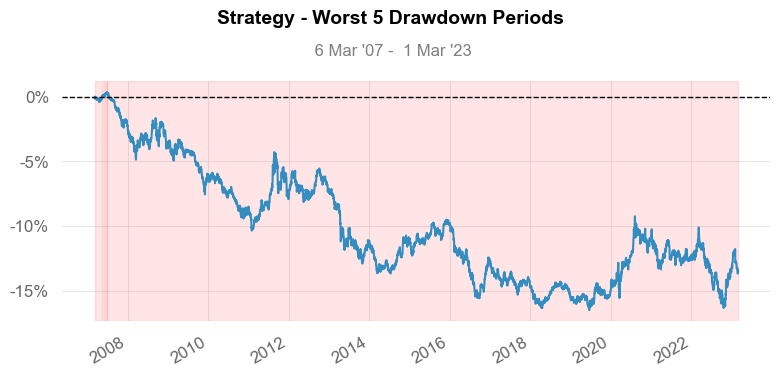

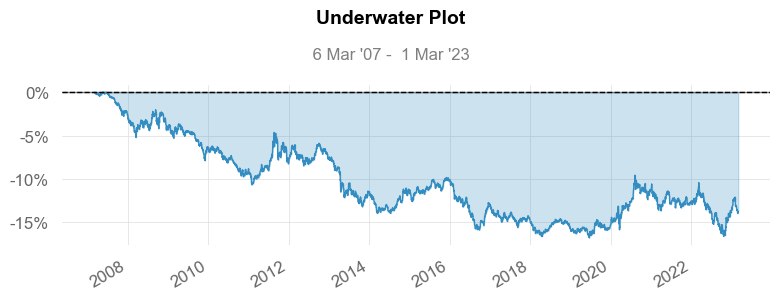

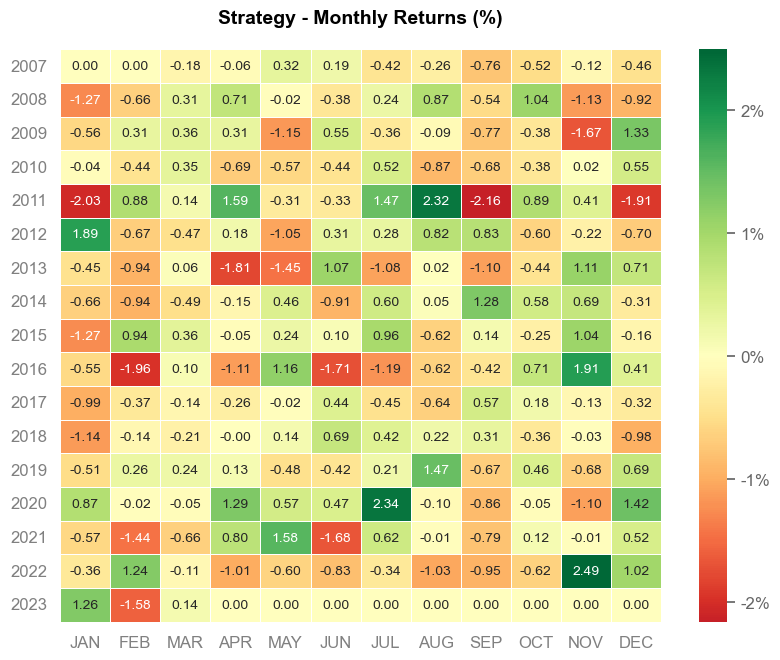

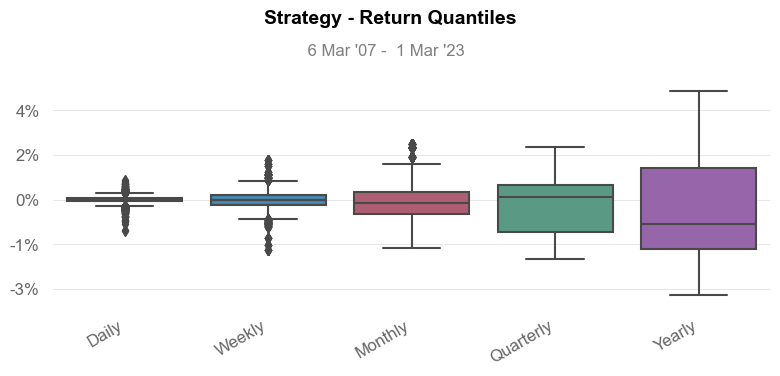

In [40]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [41]:
TF = 'M30'

In [42]:
data_1 = XAUUSD[TF]

In [43]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

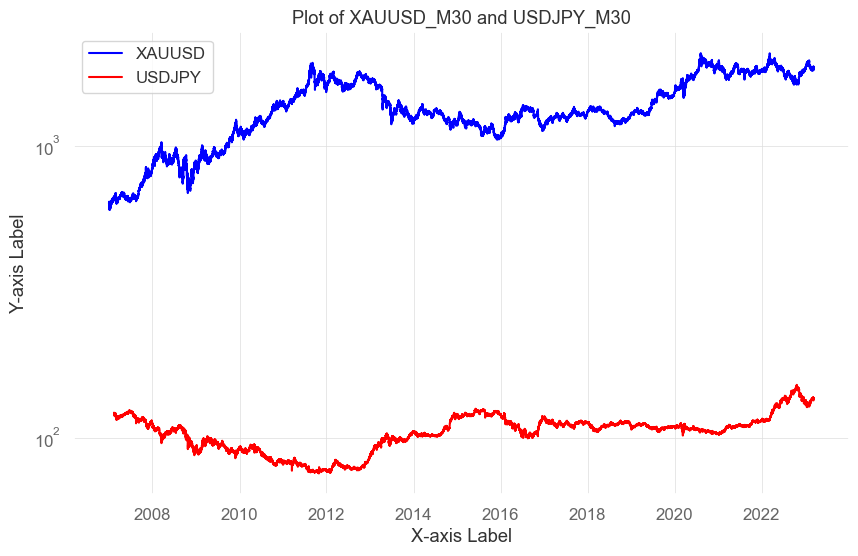

In [44]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [45]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [46]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          2.401e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:56:31   Log-Likelihood:                     -1.4668e+06
No. Observations:              198996   AIC:                                  2.934e+06
Df Residuals:                  198995   BIC:                                  2.934e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         12.6216      0.008   1549.502      0.000      12.606      12.638
==============================================================================
Omnibus:                     2716.268   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1610.342
Skew:                          -0.001   Prob(JB):                         0.00
Kurtosis:                       2.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
result = KF.Run(currency = 'JPY')

### Save Result Backtest 

In [48]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [49]:
filename = f'{Currency_Pair}_{TF}.csv'

In [50]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -14.19%
CAGR﹪                     -0.66%

Sharpe                     -0.29
Prob. Sharpe Ratio         10.13%
Smart Sharpe               -0.28
Sortino                    -0.39
Smart Sortino              -0.39
Sortino/√2                 -0.27
Smart Sortino/√2           -0.27
Omega                      0.95

Max Drawdown               -17.58%
Longest DD Days            5726
Volatility (ann.)          2.59%
Calmar                     -0.04
Skew                       -0.46
Kurtosis                   5.89

Expected Daily %           -0.0%
Expected Monthly %         -0.08%
Expected Yearly %          -0.9%
Kelly Criterion            -2.67%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.27%
Expected Shortfall (cVaR)  -0.27%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-28,2019-06-19,2023-03-01,5726,-17.579968,-17.091476
2,2007-03-11,2007-04-20,2007-05-15,66,-0.404662,-0.401485
3,2007-05-28,2007-06-06,2007-06-07,11,-0.193415,-0.172844
4,2007-03-07,2007-03-07,2007-03-08,2,-0.068174,-0.023874
5,2007-06-17,2007-06-19,2007-06-19,3,-0.058695,-0.010065


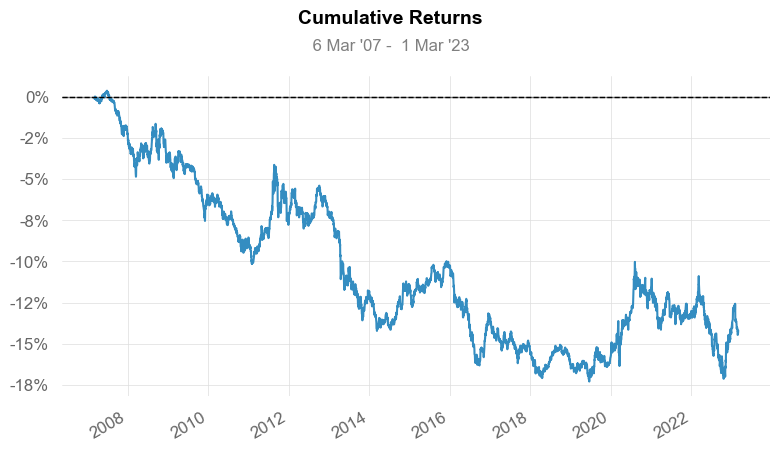

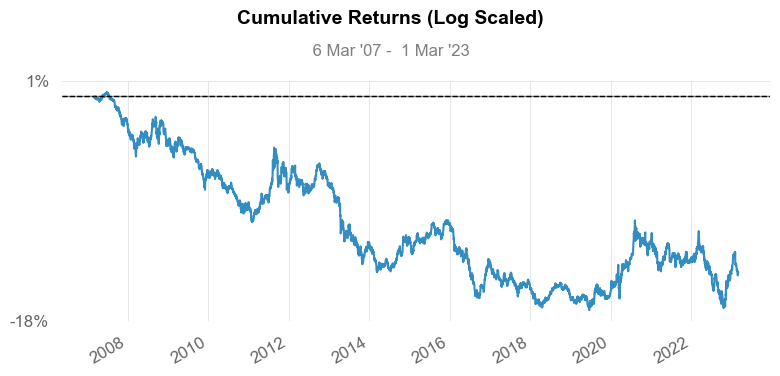

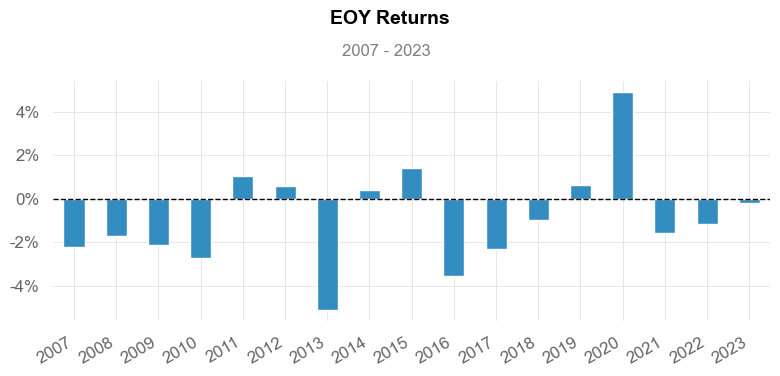

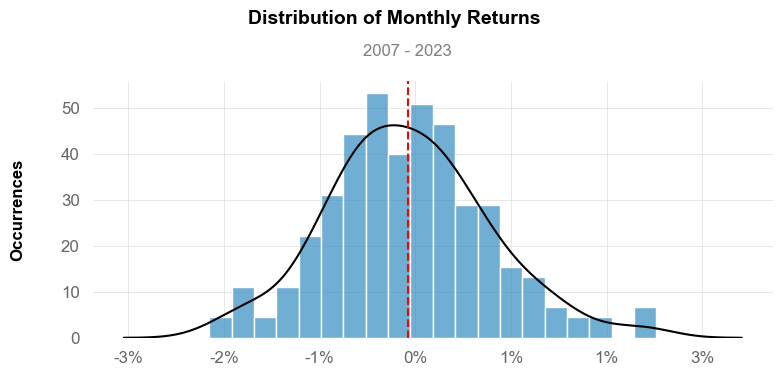

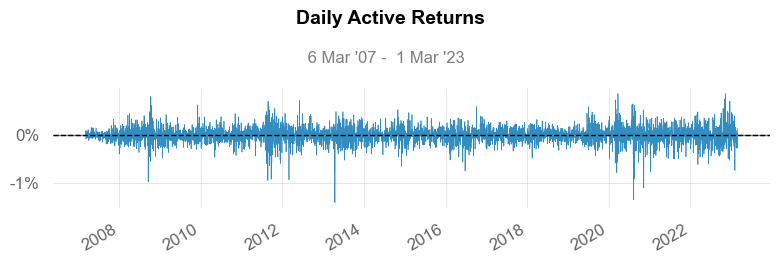

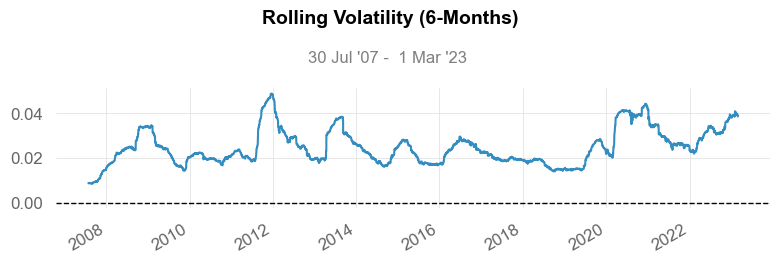

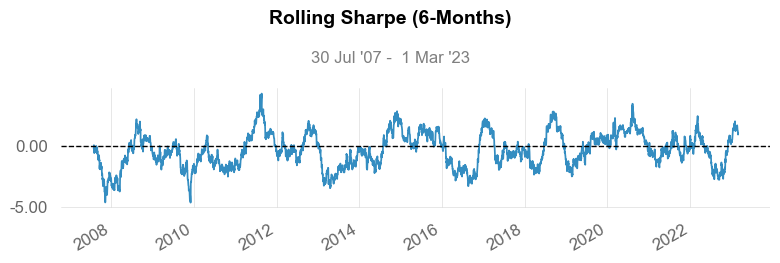

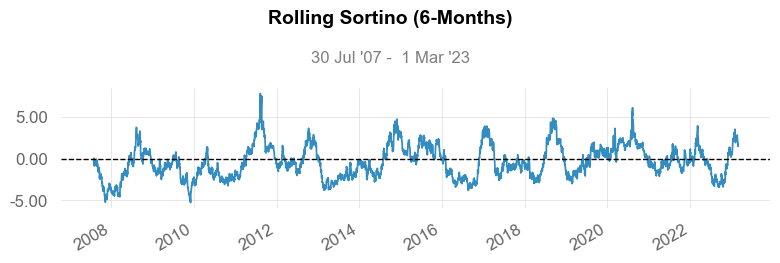

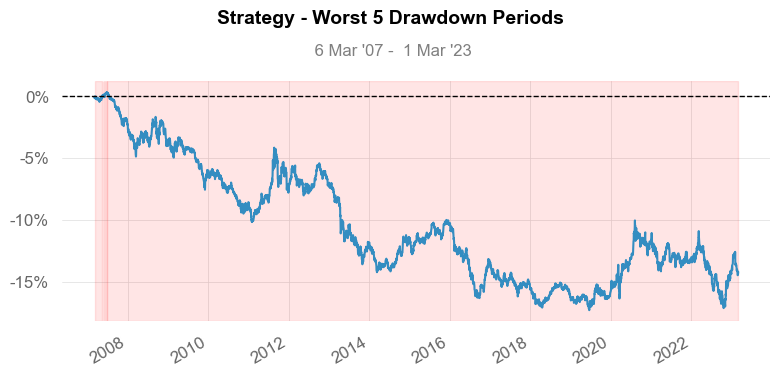

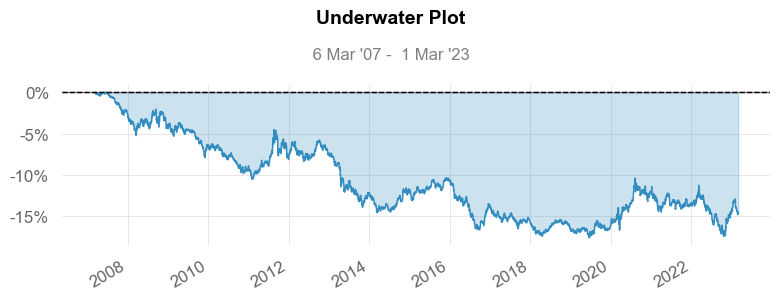

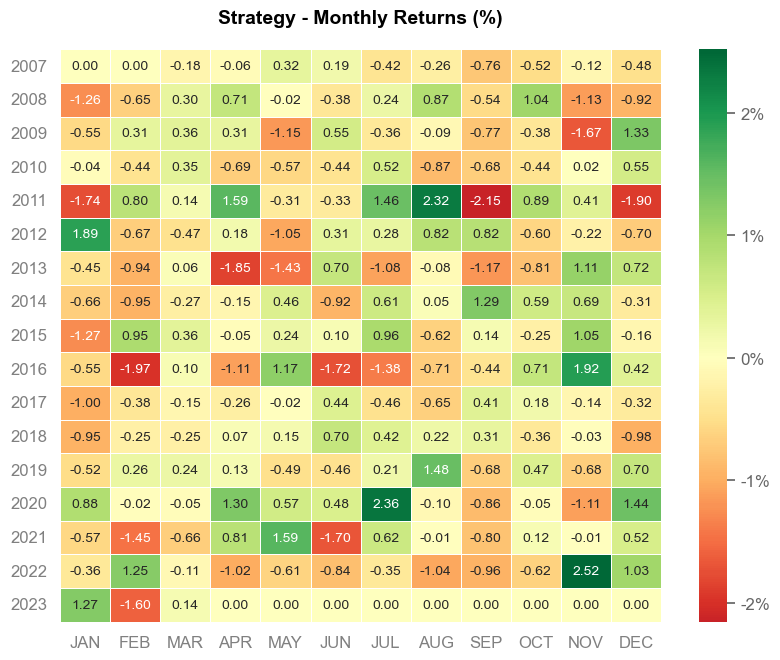

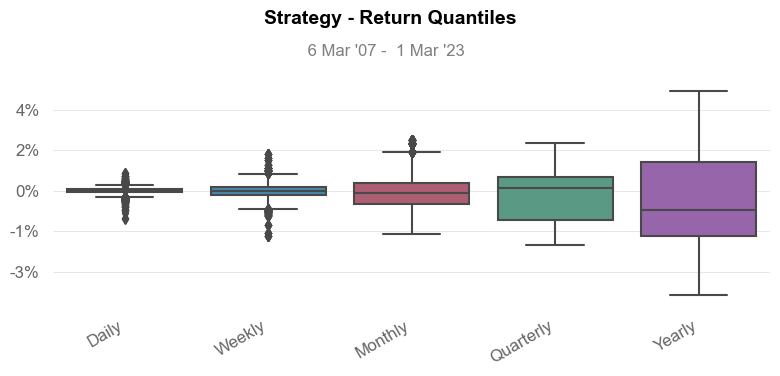

In [51]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())